In [1]:
import pandas as pd
import numpy as np
import os 
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(os.path.join('data', 'set-a', '132539.txt'), sep=',')
df['Time'] = pd.to_timedelta(df['Time'] + ":00")
df['Time'] = pd.to_timedelta(np.ceil(df['Time'].dt.total_seconds() / 3600) * 3600, unit='s')
df

,Time,Parameter,Value
0,0 days,RecordID,132539.00
1,0 days,Age,54.00
2,0 days,Gender,0.00
3,0 days,Height,-1.00
4,0 days,ICUType,4.00
...,...,...,...
268,2 days,NIMAP,79.33
269,2 days,NISysABP,128.00
270,2 days,RespRate,23.00
271,2 days,Temp,37.80


In [4]:
fixed_parameters = ["RecordID", "Age", "Weight", "Gender", "Height"]
fixed_values = df[df["Parameter"].isin(fixed_parameters)].set_index("Parameter")["Value"].to_dict()
fixed_values

{'RecordID': 132539.0,
 'Age': 54.0,
 'Gender': 0.0,
 'Height': -1.0,
 'Weight': -1.0}

In [5]:
df.drop(df[df["Parameter"].isin(fixed_parameters + ["ICUType"])].index, inplace=True)
df

,Time,Parameter,Value
6,0 days 01:00:00,GCS,15.00
7,0 days 01:00:00,HR,73.00
8,0 days 01:00:00,NIDiasABP,65.00
9,0 days 01:00:00,NIMAP,92.33
10,0 days 01:00:00,NISysABP,147.00
...,...,...,...
268,2 days 00:00:00,NIMAP,79.33
269,2 days 00:00:00,NISysABP,128.00
270,2 days 00:00:00,RespRate,23.00
271,2 days 00:00:00,Temp,37.80


In [6]:
df_pivot = pd.pivot_table(df, index=['Time'], columns='Parameter', values='Value', aggfunc='first').reset_index()
df_pivot

Parameter,Time,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,NIDiasABP,NIMAP,NISysABP,Na,Platelets,RespRate,Temp,Urine,WBC
0,0 days 01:00:00,NaN,NaN,15.0,NaN,NaN,NaN,73.0,NaN,NaN,65.0,92.33,147.0,NaN,NaN,19.0,35.1,900.0,NaN
1,0 days 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,62.0,87.00,137.0,NaN,NaN,18.0,NaN,30.0,NaN
2,0 days 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,52.0,75.67,123.0,NaN,NaN,19.0,NaN,170.0,NaN
3,0 days 04:00:00,NaN,NaN,15.0,NaN,NaN,33.7,80.0,NaN,NaN,52.0,72.67,114.0,NaN,NaN,20.0,37.8,60.0,NaN
4,0 days 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
5,0 days 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,45.0,66.67,110.0,NaN,NaN,17.0,NaN,170.0,NaN
6,0 days 08:00:00,NaN,NaN,15.0,NaN,NaN,NaN,64.0,NaN,NaN,49.0,68.33,107.0,NaN,NaN,15.0,38.1,120.0,NaN
7,0 days 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,56.0,71.33,102.0,NaN,NaN,14.0,NaN,80.0,NaN
8,0 days 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,48.0,70.00,114.0,NaN,NaN,17.0,NaN,100.0,NaN
9,0 days 11:00:00,13.0,0.8,NaN,205.0,26.0,33.5,61.0,4.4,1.5,62.0,77.67,109.0,137.0,221.0,15.0,NaN,60.0,11.2


In [7]:
for param, value in fixed_values.items():
    df_pivot[param] = value
df_pivot

Parameter,Time,BUN,Creatinine,GCS,Glucose,HCO3,HCT,HR,K,Mg,...,Platelets,RespRate,Temp,Urine,WBC,RecordID,Age,Gender,Height,Weight
0,0 days 01:00:00,NaN,NaN,15.0,NaN,NaN,NaN,73.0,NaN,NaN,...,NaN,19.0,35.1,900.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
1,0 days 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,...,NaN,18.0,NaN,30.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
2,0 days 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,...,NaN,19.0,NaN,170.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
3,0 days 04:00:00,NaN,NaN,15.0,NaN,NaN,33.7,80.0,NaN,NaN,...,NaN,20.0,37.8,60.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
4,0 days 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,74.0,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,132539.0,54.0,0.0,-1.0,-1.0
5,0 days 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,...,NaN,17.0,NaN,170.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
6,0 days 08:00:00,NaN,NaN,15.0,NaN,NaN,NaN,64.0,NaN,NaN,...,NaN,15.0,38.1,120.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
7,0 days 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,...,NaN,14.0,NaN,80.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
8,0 days 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,...,NaN,17.0,NaN,100.0,NaN,132539.0,54.0,0.0,-1.0,-1.0
9,0 days 11:00:00,13.0,0.8,NaN,205.0,26.0,33.5,61.0,4.4,1.5,...,221.0,15.0,NaN,60.0,11.2,132539.0,54.0,0.0,-1.0,-1.0


In [9]:
for file in os.listdir(os.path.join('data', 'set-a')):
    if file.endswith('.txt'):
        df = pd.read_csv(os.path.join('data', 'set-a', file), sep=',')

In [10]:
def process_file(file_path):
    """
    Reads and processes a single txt file and returns a pivoted DataFrame.
    """
    # Read file and parse CSV data
    df = pd.read_csv(file_path, sep=',')
    
    # Convert 'Time' column: append ":00", convert to timedelta, then round up to the next hour.
    df['Time'] = pd.to_timedelta(df['Time'] + ":00")
    df['Time'] = pd.to_timedelta(np.ceil(df['Time'].dt.total_seconds() / 3600) * 3600, unit='s')
    
    # Define fixed parameters and extract their constant values
    fixed_parameters = ["RecordID", "Age", "Weight", "Gender", "Height", "ICUType"]
    fixed_values = df[df["Parameter"].isin(fixed_parameters)].set_index("Parameter")["Value"].to_dict()
    
    # Drop rows corresponding to fixed parameters and ICUType as they're not needed for pivoting
    df = df[~df["Parameter"].isin(fixed_parameters)]
    
    # Pivot the DataFrame so that each time point becomes a row and Parameters become columns
    df_pivot = pd.pivot_table(df, index=['Time'], columns='Parameter', values='Value', aggfunc='first').reset_index()
    
    # Add fixed values (e.g. RecordID, Age, etc.) as constant columns in each pivoted DataFrame
    for param, value in fixed_values.items():
        df_pivot[param] = value
        
    columns_order = ['Time'] + fixed_parameters + [col for col in df_pivot.columns if col not in ['Time'] + fixed_parameters]
    return df_pivot[columns_order]

In [11]:
def combine_files_in_folder(folder_path):
    """
    Processes all .txt files in the specified folder and combines the results into one DataFrame.
    """
    # Get list of all txt files in the folder
    all_files = os.listdir(folder_path)
    all_dfs = []
    
    for file in all_files:
        processed_df = process_file(os.path.join(folder_path, file))
        all_dfs.append(processed_df)
    
    # Concatenate all processed DataFrames into one final DataFrame
    combined_df = pd.concat(all_dfs, ignore_index=True)
    return combined_df

In [12]:
patient_df = combine_files_in_folder(os.path.join('data', 'set-a'))
patient_df

Parameter,Time,RecordID,Age,Weight,Gender,Height,ICUType,BUN,Creatinine,GCS,...,pH,ALP,ALT,AST,Albumin,Bilirubin,Lactate,Cholesterol,TroponinI,TroponinT
0,0 days 01:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0 days 02:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0 days 03:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0 days 04:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0 days 05:00:00,132539.0,54.0,-1.0,0.0,-1.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179501,1 days 20:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,NaN,...,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179502,1 days 21:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179503,1 days 22:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,14.0,...,7.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179504,1 days 23:00:00,142673.0,78.0,87.3,0.0,157.5,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
outcomes_df = pd.read_csv(os.path.join('data', 'Outcomes-a.txt'), sep=',')
outcomes_df

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0
3,132543,7,1,9,575,0
4,132545,17,2,4,918,0
...,...,...,...,...,...,...
3995,142665,19,7,10,336,0
3996,142667,8,2,3,-1,0
3997,142670,8,5,11,-1,0
3998,142671,22,10,8,7,1


In [14]:
patient_df.columns

Index(['Time', 'RecordID', 'Age', 'Weight', 'Gender', 'Height', 'ICUType',
       'BUN', 'Creatinine', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'Platelets', 'RespRate', 'Temp',
       'Urine', 'WBC', 'DiasABP', 'FiO2', 'MAP', 'MechVent', 'PaCO2', 'PaO2',
       'SaO2', 'SysABP', 'pH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin',
       'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT'],
      dtype='object', name='Parameter')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179506 entries, 0 to 179505
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   Time         179506 non-null  timedelta64[ns]
 1   RecordID     179506 non-null  float64        
 2   Age          179506 non-null  float64        
 3   Weight       179506 non-null  float64        
 4   Gender       179506 non-null  float64        
 5   Height       179506 non-null  float64        
 6   ICUType      179506 non-null  float64        
 7   BUN          13889 non-null   float64        
 8   Creatinine   13955 non-null   float64        
 9   GCS          61070 non-null   float64        
 10  Glucose      12991 non-null   float64        
 11  HCO3         13583 non-null   float64        
 12  HCT          18177 non-null   float64        
 13  HR           172979 non-null  float64        
 14  K            14407 non-null   float64        
 15  Mg           1357

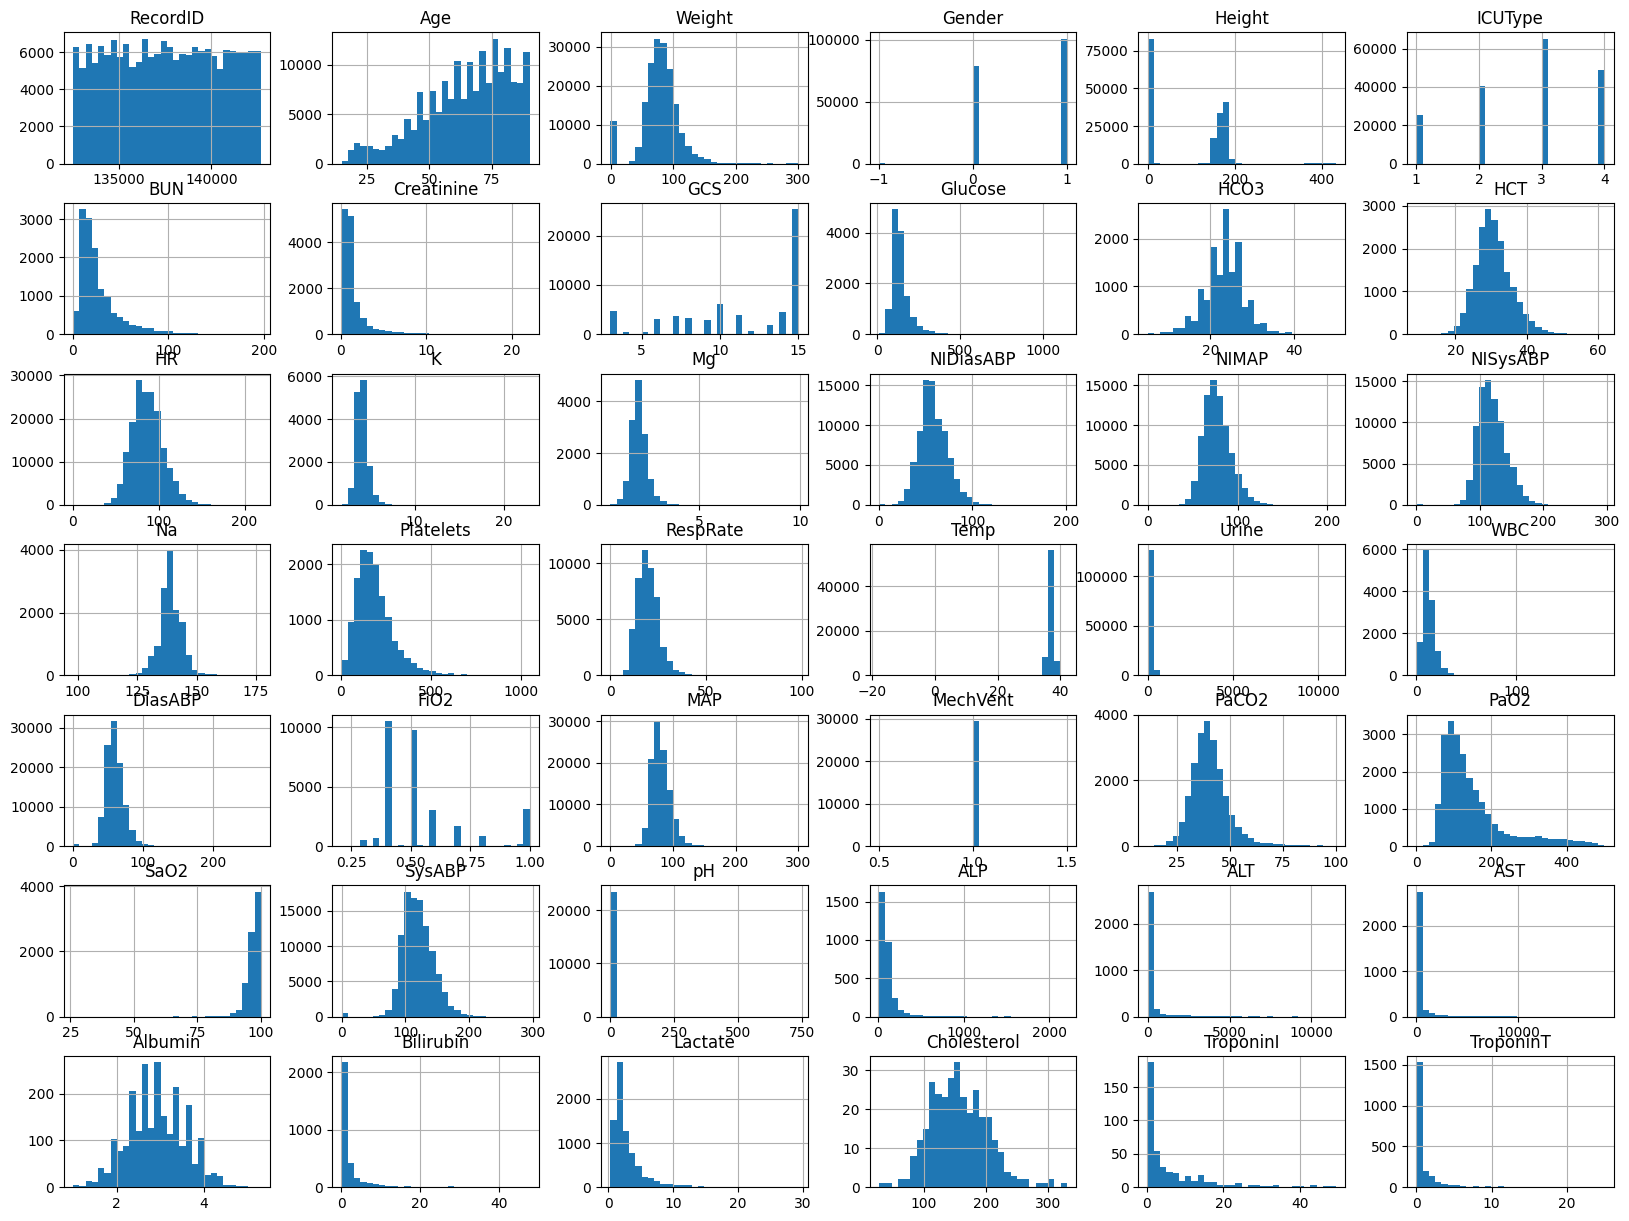

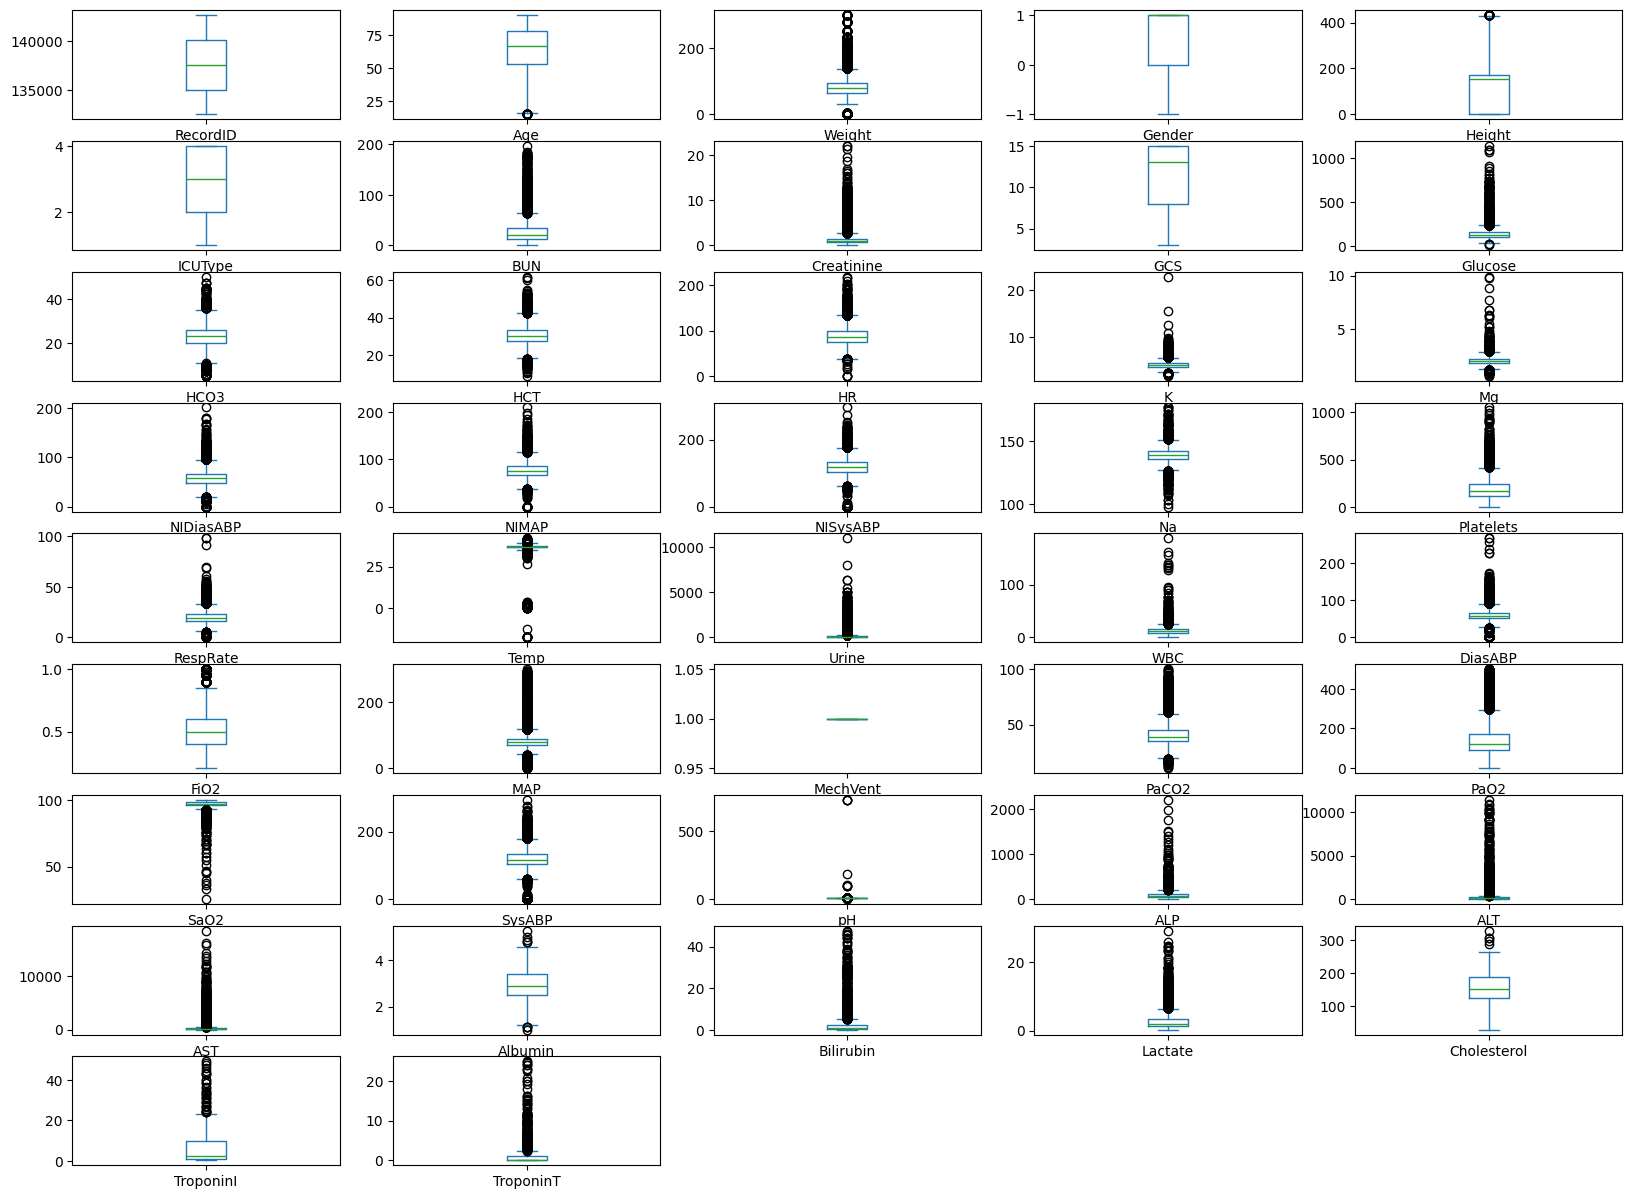

Categorical columns: Index([], dtype='object', name='Parameter')


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load the data into a DataFrame
# Assuming patient_df is already loaded, otherwise use pd.read_csv or similar method to load it

# Display basic information about the DataFrame
print(patient_df.info())

# Display descriptive statistics
print(patient_df.describe())

# Plot histograms for each numerical column
patient_df.hist(bins=30, figsize=(20, 15))
plt.show()

# Plot boxplots for each numerical column to check for outliers
num_columns = len(patient_df.select_dtypes(include=['number']).columns)
layout = (math.ceil(num_columns / 5), 5)
patient_df.plot(kind='box', subplots=True, layout=layout, figsize=(20, 15))
plt.show()

# Check for categorical data
categorical_columns = patient_df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

# Plot count plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=patient_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
patient_df.to_csv('patient_data.csv', index=False)

Observations: Way more Gender "1" 
Age: In general more older population which makes sense
ICUType: 3 is the far majority 

## 1.3 Preprocessing

In [7]:
patient_df = pd.read_csv('patient_data.csv')

In [8]:
patient_df.columns

Index(['Time', 'RecordID', 'Age', 'Weight', 'Gender', 'Height', 'ICUType',
       'BUN', 'Creatinine', 'GCS', 'Glucose', 'HCO3', 'HCT', 'HR', 'K', 'Mg',
       'NIDiasABP', 'NIMAP', 'NISysABP', 'Na', 'Platelets', 'RespRate', 'Temp',
       'Urine', 'WBC', 'DiasABP', 'FiO2', 'MAP', 'MechVent', 'PaCO2', 'PaO2',
       'SaO2', 'SysABP', 'pH', 'ALP', 'ALT', 'AST', 'Albumin', 'Bilirubin',
       'Lactate', 'Cholesterol', 'TroponinI', 'TroponinT'],
      dtype='object')

For now, only forward filling. Nothing is done if the first row is null. One option would be to add the median to all of the remaining nulls after forward filling.

In [9]:
patient_df = patient_df.sort_values(by=['RecordID', 'Time'])
cols_to_ffill = [col for col in patient_df.columns if col != 'RecordID']
patient_df_imputed = patient_df.groupby('RecordID')[cols_to_ffill].apply(lambda group: group.ffill())
patient_df_imputed

Time   Age  Weight  Gender  Height  ICUType   BUN  \
RecordID                                                                        
132539.0 0       0 days 01:00:00  54.0    -1.0     0.0    -1.0      4.0   NaN   
         1       0 days 02:00:00  54.0    -1.0     0.0    -1.0      4.0   NaN   
         2       0 days 03:00:00  54.0    -1.0     0.0    -1.0      4.0   NaN   
         3       0 days 04:00:00  54.0    -1.0     0.0    -1.0      4.0   NaN   
         4       0 days 05:00:00  54.0    -1.0     0.0    -1.0      4.0   NaN   
...                          ...   ...     ...     ...     ...      ...   ...   
142673.0 179501  1 days 20:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179502  1 days 21:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179503  1 days 22:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179504  1 days 23:00:00  78.0    87.3     0.0   157.5      4.0  24.0   
         179505  2 days 00:00:00  78.0    87.3     0.0   157.5      4.0  24.0   

                 Creatinine   GCS  Glucose  ...    pH   ALP  ALT   AST  \
RecordID                                    ...                          
132539.0 0              NaN  15.0      NaN  ...   NaN   NaN  NaN   NaN   
         1              NaN  15.0      NaN  ...   NaN   NaN  NaN   NaN   
         2              NaN  15.0      NaN  ...   NaN   NaN  NaN   NaN   
         3              NaN  15.0      NaN  ...   NaN   NaN  NaN   NaN   
         4              NaN  15.0      NaN  ...   NaN   NaN  NaN   NaN   
...                     ...   ...      ...  ...   ...   ...  ...   ...   
142673.0 179501         1.5  11.0    126.0  ...  7.34  42.0  9.0  99.0   
         179502         1.5  15.0    126.0  ...  7.34  42.0  9.0  99.0   
         179503         1.5  14.0    126.0  ...  7.31  42.0  9.0  99.0   
         179504         1.5  14.0    126.0  ...  7.31  42.0  9.0  99.0   
         179505         1.5  14.0    126.0  ...  7.31  42.0  9.0  99.0   

                 Albumin  Bilirubin  Lactate  Cholesterol  TroponinI  \
RecordID                                                               
132539.0 0           NaN        NaN      NaN          NaN        NaN   
         1           NaN        NaN      NaN          NaN        NaN   
         2           NaN        NaN      NaN          NaN        NaN   
         3           NaN        NaN      NaN          NaN        NaN   
         4           NaN        NaN      NaN          NaN        NaN   
...                  ...        ...      ...          ...        ...   
142673.0 179501      2.2        0.5      1.8          NaN        NaN   
         179502      2.2        0.5      1.8          NaN        NaN   
         179503      2.2        0.5      1.8          NaN        NaN   
         179504      2.2        0.5      1.8          NaN        NaN   
         179505      2.2        0.5      1.8          NaN        NaN   

                 TroponinT  
RecordID                    
132539.0 0             NaN  
         1             NaN  
         2             NaN  
         3             NaN  
         4             NaN  
...                    ...  
142673.0 179501        NaN  
         179502        NaN  
         179503        NaN  
         179504        NaN  
         179505        NaN  

[179506 rows x 42 columns]

In [12]:
cols_to_exclude = ["RecordID", "Time", "Gender", "ICUType"]
numeric_cols = [col for col in patient_df_imputed.columns 
                if col not in cols_to_exclude and 
                np.issubdtype(patient_df_imputed[col].dtype, np.number)]

In [13]:
patient_df_filled = patient_df_imputed.copy()
patient_df_filled = patient_df_imputed[numeric_cols].fillna(patient_df_imputed[numeric_cols].median())
patient_df_filled

Age  Weight  Height   BUN  Creatinine   GCS  Glucose  HCO3  \
RecordID                                                                       
132539.0 0       54.0    -1.0    -1.0  19.0         0.9  15.0    126.0  24.0   
         1       54.0    -1.0    -1.0  19.0         0.9  15.0    126.0  24.0   
         2       54.0    -1.0    -1.0  19.0         0.9  15.0    126.0  24.0   
         3       54.0    -1.0    -1.0  19.0         0.9  15.0    126.0  24.0   
         4       54.0    -1.0    -1.0  19.0         0.9  15.0    126.0  24.0   
...               ...     ...     ...   ...         ...   ...      ...   ...   
142673.0 179501  78.0    87.3   157.5  24.0         1.5  11.0    126.0  19.0   
         179502  78.0    87.3   157.5  24.0         1.5  15.0    126.0  19.0   
         179503  78.0    87.3   157.5  24.0         1.5  14.0    126.0  19.0   
         179504  78.0    87.3   157.5  24.0         1.5  14.0    126.0  19.0   
         179505  78.0    87.3   157.5  24.0         1.5  14.0    126.0  19.0   

                  HCT     HR  ...    pH   ALP   ALT   AST  Albumin  Bilirubin  \
RecordID                      ...                                               
132539.0 0       31.0   73.0  ...  7.39  80.0  31.0  46.0      3.0        0.7   
         1       31.0   60.0  ...  7.39  80.0  31.0  46.0      3.0        0.7   
         2       31.0   62.0  ...  7.39  80.0  31.0  46.0      3.0        0.7   
         3       33.7   80.0  ...  7.39  80.0  31.0  46.0      3.0        0.7   
         4       33.7   74.0  ...  7.39  80.0  31.0  46.0      3.0        0.7   
...               ...    ...  ...   ...   ...   ...   ...      ...        ...   
142673.0 179501  30.7  120.0  ...  7.34  42.0   9.0  99.0      2.2        0.5   
         179502  30.7   92.0  ...  7.34  42.0   9.0  99.0      2.2        0.5   
         179503  30.7   85.0  ...  7.31  42.0   9.0  99.0      2.2        0.5   
         179504  30.7   86.0  ...  7.31  42.0   9.0  99.0      2.2        0.5   
         179505  30.7   86.0  ...  7.31  42.0   9.0  99.0      2.2        0.5   

                 Lactate  Cholesterol  TroponinI  TroponinT  
RecordID                                                     
132539.0 0           1.7        155.0        2.0       0.14  
         1           1.7        155.0        2.0       0.14  
         2           1.7        155.0        2.0       0.14  
         3           1.7        155.0        2.0       0.14  
         4           1.7        155.0        2.0       0.14  
...                  ...          ...        ...        ...  
142673.0 179501      1.8        155.0        2.0       0.14  
         179502      1.8        155.0        2.0       0.14  
         179503      1.8        155.0        2.0       0.14  
         179504      1.8        155.0        2.0       0.14  
         179505      1.8        155.0        2.0       0.14  

[179506 rows x 39 columns]

In [17]:
patient_df.isna().sum().sum(), patient_df_filled.isna().sum().sum()

(np.int64(5123966), np.int64(0))

In [18]:
scaler = StandardScaler()
df_scaled = patient_df_filled.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])
df_scaled

Age    Weight    Height       BUN  Creatinine       GCS  \
RecordID                                                                        
132539.0 0      -0.596605 -2.588766 -1.061398 -0.292447   -0.308919  0.836113   
         1      -0.596605 -2.588766 -1.061398 -0.292447   -0.308919  0.836113   
         2      -0.596605 -2.588766 -1.061398 -0.292447   -0.308919  0.836113   
         3      -0.596605 -2.588766 -1.061398 -0.292447   -0.308919  0.836113   
         4      -0.596605 -2.588766 -1.061398 -0.292447   -0.308919  0.836113   
...                   ...       ...       ...       ...         ...       ...   
142673.0 179501  0.781907  0.292499  0.771789 -0.044257    0.128413 -0.187795   
         179502  0.781907  0.292499  0.771789 -0.044257    0.128413  0.836113   
         179503  0.781907  0.292499  0.771789 -0.044257    0.128413  0.580136   
         179504  0.781907  0.292499  0.771789 -0.044257    0.128413  0.580136   
         179505  0.781907  0.292499  0.771789 -0.044257    0.128413  0.580136   

                  Glucose      HCO3       HCT        HR  ...        pH  \
RecordID                                                 ...             
132539.0 0      -0.180308  0.096456 -0.103555 -0.774483  ... -0.013690   
         1      -0.180308  0.096456 -0.103555 -1.506885  ... -0.013690   
         2      -0.180308  0.096456 -0.103555 -1.394207  ... -0.013690   
         3      -0.180308  0.096456  0.466419 -0.380113  ... -0.013690   
         4      -0.180308  0.096456  0.466419 -0.718145  ... -0.013690   
...                   ...       ...       ...       ...  ...       ...   
142673.0 179501 -0.180308 -1.113270 -0.166885  1.873430  ... -0.022018   
         179502 -0.180308 -1.113270 -0.166885  0.295950  ... -0.022018   
         179503 -0.180308 -1.113270 -0.166885 -0.098420  ... -0.027015   
         179504 -0.180308 -1.113270 -0.166885 -0.042082  ... -0.027015   
         179505 -0.180308 -1.113270 -0.166885 -0.042082  ... -0.027015   

                      ALP       ALT       AST   Albumin  Bilirubin   Lactate  \
RecordID                                                                       
132539.0 0      -0.138807 -0.123519 -0.118460  0.009375  -0.160862 -0.195203   
         1      -0.138807 -0.123519 -0.118460  0.009375  -0.160862 -0.195203   
         2      -0.138807 -0.123519 -0.118460  0.009375  -0.160862 -0.195203   
         3      -0.138807 -0.123519 -0.118460  0.009375  -0.160862 -0.195203   
         4      -0.138807 -0.123519 -0.118460  0.009375  -0.160862 -0.195203   
...                   ...       ...       ...       ...        ...       ...   
142673.0 179501 -0.717582 -0.172539 -0.035129 -2.180856  -0.230635 -0.114322   
         179502 -0.717582 -0.172539 -0.035129 -2.180856  -0.230635 -0.114322   
         179503 -0.717582 -0.172539 -0.035129 -2.180856  -0.230635 -0.114322   
         179504 -0.717582 -0.172539 -0.035129 -2.180856  -0.230635 -0.114322   
         179505 -0.717582 -0.172539 -0.035129 -2.180856  -0.230635 -0.114322   

                 Cholesterol  TroponinI  TroponinT  
RecordID                                            
132539.0 0          -0.01868   -0.08847  -0.146278  
         1          -0.01868   -0.08847  -0.146278  
         2          -0.01868   -0.08847  -0.146278  
         3          -0.01868   -0.08847  -0.146278  
         4          -0.01868   -0.08847  -0.146278  
...                      ...        ...        ...  
142673.0 179501     -0.01868   -0.08847  -0.146278  
         179502     -0.01868   -0.08847  -0.146278  
         179503     -0.01868   -0.08847  -0.146278  
         179504     -0.01868   -0.08847  -0.146278  
         179505     -0.01868   -0.08847  -0.146278  

[179506 rows x 39 columns]

Just used standard scaling to normalise the distribution, since most of the distributions were a normal distribution. An option would be to apply log transformation to the distributions that are tail heavy


# 2 Supervised Learning

## 2.1

In [10]:
patient_df_imputed.isnull().sum()

Time                0
Age                 0
Weight              0
Gender              0
Height              0
ICUType             0
BUN             20495
Creatinine      20446
GCS              5385
Glucose         29895
HCO3            22183
HCT             18829
HR               2732
K               27509
Mg              28792
NIDiasABP       39391
NIMAP           39537
NISysABP        38977
Na              26796
Platelets       20267
RespRate       131210
Temp             4317
Urine            7988
WBC             23800
DiasABP         62404
FiO2            66086
MAP             62966
MechVent        71604
PaCO2           54422
PaO2            54518
SaO2           115000
SysABP          62403
pH              53803
ALP            118632
ALT            117493
AST            117397
Albumin        124022
Bilirubin      118273
Lactate         95005
Cholesterol    169146
TroponinI      172071
TroponinT      145619
dtype: int64